# Dorm properties and individual well-being

Compares individual and dorm-aggregate results from the trait survey to spring well-being measures. This gives us an N of about 200 students across 11 dorms (ranging from 7-34 participants per dorm).

**AIM:** We want to know things like: is the dorm's average level of Agreeableness related to individual change in well-being from fall to spring? What about the dorm's average extraversion? Empathy?

**RESULTS:** We have a lot of measures, and consequently a lot of results. Some are surely spurious (see Procedure) but too many are significant for all to be spurious. Broad-strokes findings:
1. There's a clear regression to the mean for individuals -- those who were extra happy in the fall tend to report being less happy in the spring, and those who are extra sad in the fall tend to report being less-sad in the spring. This is reasonable, as people who are having an especially good or bad day, when they take the test in the fall, are unlikely to have a similarly extreme day when tested in the spring.
1. However, at the dorm level, this disappears. Dorm fall-spring correlations are nonsignificant, but positive, showing the smoothing effect of pooling participants.
1. The 

**Procedure:**
1. Filter for students who participated in BOTH the fall trait survey AND the spring well-being/network survey.
1. Create a composite fall well-being measure from SWLS, Subjective Happiness, PSS, Loneliness, Anxiety
  * Spring well-being composite already exists, which is an average of ~15 questions about happiness, anxiety, stress, loneliness, etc (see below).
1. Standardize fall and spring well-being measures to 0 mean and unit variance.
1. Compute "well being change" as the difference between the two (spring well-being minus fall well-being)
1. Correlate "well being change" with all trait-survey measures
1. To get a sense of statistical significance of each column's correlation, randomly shuffle the values in each column many times, and compute the new (by-definition-spurious) correlation with WB change each time. Plot the 95% central range of these spurious values, and see if our sample's value falls outside of them.
   * Note: while we could correct for multiple-testing here, this analysis is exploratory and we want to flag correlations of interest in future research. Given that we have about 50 IVs from the trait survey, we'd expect 2-3 to be spuriously flagged as significant (using a 5% threshold) -- here we find closer to 10-15, so most are likely robust.

**(Reference): Spring well-being measure:**
1. I feel connected to my friends and family. (Wellbeing_self_17) 
1. I feel lonely. (Lonely) 
1. I feel stressed. (Stressed) 
1. I feel satisfied with my life. (Satisfied) 
1. I dwell on my negative feelings or problems. (Rumination) 
1. I feel that there were people I could talk to. (Wellbeing_self_18) 
1. I feel afraid or uncomfortable doing things (like speaking, eating, or writing) in front of other people. (Social_Anxiety) 
1. I feel content. (Wellbeing_self_22) 
1. I feel nervous or anxious. (Anxiety_1) 
1. I worry a lot about bad things that might happen. (Anxiety_2) 
1. I feel confident about my ability to handle my personal problems. (Wellbeing_self_19) 
1. I feel depressed or down. (Depression) 
1. I lack interest or pleasure in things I usually enjoy. (Anhedonia) 
1. I feel hopeful about the future. (Wellbeing_self_21) 

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Configure" data-toc-modified-id="Configure-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Configure</a></span></li><li><span><a href="#Import-and-load" data-toc-modified-id="Import-and-load-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Import and load</a></span></li><li><span><a href="#Restrict-to-the-columns-of-interest-to-us" data-toc-modified-id="Restrict-to-the-columns-of-interest-to-us-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Restrict to the columns of interest to us</a></span></li><li><span><a href="#Restrict-to-students-who-completed-both-the-trait-and-spring-wb-surveys" data-toc-modified-id="Restrict-to-students-who-completed-both-the-trait-and-spring-wb-surveys-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Restrict to students who completed both the <code>trait</code> and spring <code>wb</code> surveys</a></span></li><li><span><a href="#Create-standardized-well-being-columns" data-toc-modified-id="Create-standardized-well-being-columns-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Create standardized well-being columns</a></span><ul class="toc-item"><li><span><a href="#Create-fall-composite-well-being-score,-averaging-several-normalized-wb-related-columns" data-toc-modified-id="Create-fall-composite-well-being-score,-averaging-several-normalized-wb-related-columns-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Create fall composite well-being score, averaging several normalized wb-related columns</a></span></li><li><span><a href="#Compute-well-being-change" data-toc-modified-id="Compute-well-being-change-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Compute well-being change</a></span></li><li><span><a href="#Sanity-checks" data-toc-modified-id="Sanity-checks-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>Sanity checks</a></span></li></ul></li><li><span><a href="#Quick-dorm-level-summary" data-toc-modified-id="Quick-dorm-level-summary-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Quick dorm-level summary</a></span></li><li><span><a href="#Split-off-&quot;test&quot;-data---two-entire-dorms,-approximately-20%-of-all-data" data-toc-modified-id="Split-off-&quot;test&quot;-data---two-entire-dorms,-approximately-20%-of-all-data-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Split off "test" data - two entire dorms, approximately 20% of all data</a></span></li><li><span><a href="#Analyses" data-toc-modified-id="Analyses-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Analyses</a></span><ul class="toc-item"><li><span><a href="#Glance-at-raw-correlations----a-bit-overwhelming,-though" data-toc-modified-id="Glance-at-raw-correlations----a-bit-overwhelming,-though-8.1"><span class="toc-item-num">8.1&nbsp;&nbsp;</span>Glance at raw correlations -- a bit overwhelming, though</a></span></li><li><span><a href="#Goal" data-toc-modified-id="Goal-8.2"><span class="toc-item-num">8.2&nbsp;&nbsp;</span>Goal</a></span></li></ul></li></ul></div>

## Configure

In [1]:
DATA_DIR = '/Users/everettwetchler/src/research/zaki/github/analysis/data/'
PLOT_DIR = '/Users/everettwetchler/src/research/zaki/github/analysis/plots/'
KEEP_ALL_PREDICTORS = True

## Import and load

In [2]:
####################################################
# Boilerplate import/setup code for general analysis
# everett.wetchler@gmail.com
####################################################

# Plot directly in notebook
# NOTE: break this command into it's own cell, and run
# it BEFORE everything below it. Unfortunately that's
# the only way to get the plot settings to stick.
%matplotlib inline

Everett Wetchler 2019-12-03 10:32:40 PST 

CPython 3.6.5
IPython 7.8.0

numpy 1.17.3
pandas 0.25.1
matplotlib 3.1.0
seaborn 0.9.0
watermark 2.0.1


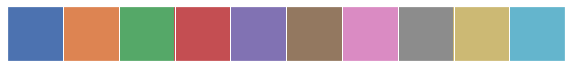

In [3]:
import datetime as dt
import os
import random
import re
import simplejson as json

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns
sns.set()

pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 500)

# Customize default chart graphics
mpl.rcParams.update({
  'font.size': 14,
  'axes.titlesize': 'x-large',
  'axes.labelsize': 'large',
  'xtick.labelsize': 'medium',
  'ytick.labelsize': 'medium',
  'legend.fancybox': True,
  'legend.fontsize': 'medium',
  'legend.frameon': True,
  'legend.framealpha': 0.7,
  'figure.figsize': ['9', '6'],
})

# It's useful to have some named colors handy
(SNS_BLUE, SNS_ORANGE, SNS_GREEN,
 SNS_RED, SNS_PURPLE, SNS_BROWN,
 SNS_PINK, SNS_GRAY, SNS_YELLOW,
 SNS_CYAN) = sns.color_palette()
sns.palplot(sns.color_palette())

# Watermark extension to print version/system information
# Flags:
# -a [author] --v (python/ipython versions) -d (date)
# -t (time) -z (timezone) -r (repo)
# -g (git hash) -w (watermark version)
# -p [packages] (package info)
%load_ext watermark
%watermark -a 'Everett Wetchler' -v -d -t -z -w -p numpy,pandas,matplotlib,seaborn

####################################################
# END Boilerplate
####################################################

In [4]:
df = pd.read_csv(os.path.join(DATA_DIR, 'postprocessed/merged.csv'))
print(df.shape)
df.head()

(1077, 84)


,PID,NID,Extraversion_prefrosh,BAS_prefrosh,NTB_prefrosh,EC_prefrosh,PD_prefrosh,PT_prefrosh,Prosociality_prefrosh,Loneliness_prefrosh,Loneliness_R_prefrosh,PSS_prefrosh,PSS_R_prefrosh,Subj_Happiness_prefrosh,SWL_prefrosh,MalleableEmpathy_prefrosh,EMPATHY_prefrosh,POSITIVITY_prefrosh,NEGATIVITY_prefrosh,LIFE_SATISFACTION_prefrosh,Extraversion_trait,Agreeableness_trait,Openness_trait,Conscientiousness_trait,NPI_trait,Positive_empathy_trait,Pos_efficacy_trait,Neg_efficacy_trait,Pos_tendency_trait,Neg_Tendency_trait,CESD_trait,STAI_Anxiety_trait,Need_Belong_trait,Prosociality_trait,Loneliness_trait,PSS_trait,SubjHappiness_trait,SWLS_trait,Emp_theory_trait,RS_1_trait,RS_2_trait,Self_Esteem_trait,Self_monitor_trait,Distress_Disclosure_trait,Guidance_trait,Warmth_trait,Integration_trait,Attachment_trait,Nurturance_trait,Reliable_trait,Anticipated_Risks_trait,Anticipated_Benefits_trait,PI_trait,SI_trait,CI_trait,BFNE_trait,BAS_drive_trait,BAS_Fun_seeking_trait,BAS_Fun_Reward_responsiveness_trait,Suppression_trait,Cogntive_Reappraisal_trait,Extensic_improve_trait,Extensic_worse_trait,Intrinsic_imrpove_trait,Intrinsic_worse_trait,Empathic_Concern_trait,Perspective_Taking_trait,Personal_Distress_trait,Wellbeing_self_17_wb,Lonely_wb,Stressed_wb,Satisfied_wb,Rumination_wb,Wellbeing_self_18_wb,Social_Anxiety_wb,Wellbeing_self_22_wb,Anxiety_1_wb,Anxiety_2_wb,Wellbeing_self_19_wb,Depression_wb,Anhedonia_wb,Wellbeing_self_21_wb,Belonging_wb,Wellbeing_wb
0,UPl0A7hyV0,NaN,1.000,1.769231,2.1,3.00,1.50,3.00,3.166667,1.750,2.250,1.00,3.00,4.00,3.8,4.000000,3.291667,1.384615,1.800,3.26250,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ra1xsp248Q,NaN,1.875,2.461538,3.0,3.75,1.25,2.75,3.833333,1.875,2.125,2.50,1.50,2.75,4.4,3.333333,3.416667,2.168269,2.125,2.69375,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IqidLJtjxg,11.0,2.875,2.461538,1.8,3.25,2.00,3.00,3.250000,1.000,3.000,0.25,3.75,5.00,5.2,2.000000,2.875000,2.668269,1.900,4.23750,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,GR9ggA8Ajc,9.0,3.375,2.461538,2.4,2.25,1.00,1.75,2.750000,0.750,3.250,1.50,2.50,4.75,6.0,4.333333,2.770833,2.918269,1.700,4.12500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,4.0,3.0,4.0,4.0,4.0,4.0,3.0,3.0,3.0,4.0,4.0,4.0,4.0,4.0,3.714286
4,vgxlTMkQs5,7.0,1.250,1.769231,3.4,3.00,1.25,3.00,2.833333,2.750,1.250,2.50,1.50,1.25,3.0,2.000000,2.708333,1.509615,2.325,1.75000,4.0,4.0,5.5,4.5,4.333333,5.142857,7.5,6.25,5.25,3.75,3.1,3.684211,4.2,2.666667,2.375,3.25,4.25,4.2,3.0,6.25,5.5,3.1,19.0,3.071429,2.5,3.5,2.5,3.25,2.75,2.5,5.75,5.0,5.0,4.25,2.375,4.857143,3.25,3.0,4.2,7.0,4.166667,5.833333,2.0,3.0,5.5,2.166667,1.857143,1.428571,3.0,3.0,1.0,2.0,1.0,3.0,3.0,2.0,0.0,1.0,2.0,2.0,3.0,1.0,3.0,1.928571


In [5]:
suffixes = ['NID', '_prefrosh', '_trait', '_wb']
presence = pd.DataFrame(index=df.index)

for s in suffixes:
    frame = df[[c for c in df.columns if c.endswith(s)]]
    presence[s] = frame.notnull().sum(axis=1) > 0

In [6]:
presence.groupby(suffixes).size()

NID    _prefrosh  _trait  _wb  
False  True       False   False    335
True   False      False   True     229
                  True    False     85
                          True     110
       True       False   False     87
                          True      99
                  True    False     24
                          True     108
dtype: int64

## Restrict to the columns of interest to us

In [5]:
[c for c in df.columns if c.endswith('_prefrosh')]

['Extraversion_prefrosh',
 'BAS_prefrosh',
 'NTB_prefrosh',
 'EC_prefrosh',
 'PD_prefrosh',
 'PT_prefrosh',
 'Prosociality_prefrosh',
 'Loneliness_prefrosh',
 'Loneliness_R_prefrosh',
 'PSS_prefrosh',
 'PSS_R_prefrosh',
 'Subj_Happiness_prefrosh',
 'SWL_prefrosh',
 'MalleableEmpathy_prefrosh',
 'EMPATHY_prefrosh',
 'POSITIVITY_prefrosh',
 'NEGATIVITY_prefrosh',
 'LIFE_SATISFACTION_prefrosh']

In [6]:
df = df[[c for c in df.columns if not c.endswith('_prefrosh')]]

In [7]:
[c for c in df.columns if c.endswith('_trait')]

['Extraversion_trait',
 'Agreeableness_trait',
 'Openness_trait',
 'Conscientiousness_trait',
 'NPI_trait',
 'Positive_empathy_trait',
 'Pos_efficacy_trait',
 'Neg_efficacy_trait',
 'Pos_tendency_trait',
 'Neg_Tendency_trait',
 'CESD_trait',
 'STAI_Anxiety_trait',
 'Need_Belong_trait',
 'Prosociality_trait',
 'Loneliness_trait',
 'PSS_trait',
 'SubjHappiness_trait',
 'SWLS_trait',
 'Emp_theory_trait',
 'RS_1_trait',
 'RS_2_trait',
 'Self_Esteem_trait',
 'Self_monitor_trait',
 'Distress_Disclosure_trait',
 'Guidance_trait',
 'Warmth_trait',
 'Integration_trait',
 'Attachment_trait',
 'Nurturance_trait',
 'Reliable_trait',
 'Anticipated_Risks_trait',
 'Anticipated_Benefits_trait',
 'PI_trait',
 'SI_trait',
 'CI_trait',
 'BFNE_trait',
 'BAS_drive_trait',
 'BAS_Fun_seeking_trait',
 'BAS_Fun_Reward_responsiveness_trait',
 'Suppression_trait',
 'Cogntive_Reappraisal_trait',
 'Extensic_improve_trait',
 'Extensic_worse_trait',
 'Intrinsic_imrpove_trait',
 'Intrinsic_worse_trait',
 'Empathic_Co

In [8]:
if not KEEP_ALL_PREDICTORS:
    df = df.drop(columns=[
    #     'Extraversion_trait',
    #     'Agreeableness_trait',
    #     'Openness_trait',
    #     'Conscientiousness_trait',
        'NPI_trait',
        'Positive_empathy_trait',
        'Pos_efficacy_trait',
        'Neg_efficacy_trait',
        'Pos_tendency_trait',
        'Neg_Tendency_trait',
    #     'CESD_trait',
    #     'STAI_Anxiety_trait',
    #     'Need_Belong_trait',
        'Prosociality_trait',
    #     'Loneliness_trait',
    #     'PSS_trait',
    #     'SubjHappiness_trait',
    #     'SWLS_trait',
        'Emp_theory_trait',
        'RS_1_trait',
        'RS_2_trait',
        'Self_Esteem_trait',
        'Self_monitor_trait',
        'Distress_Disclosure_trait',
        'Guidance_trait',
        'Warmth_trait',
        'Integration_trait',
        'Attachment_trait',
        'Nurturance_trait',
        'Reliable_trait',
        'Anticipated_Risks_trait',
        'Anticipated_Benefits_trait',
        'PI_trait',
        'SI_trait',
        'CI_trait',
        'BFNE_trait',
        'BAS_drive_trait',
        'BAS_Fun_seeking_trait',
        'BAS_Fun_Reward_responsiveness_trait',
        'Suppression_trait',
        'Cogntive_Reappraisal_trait',
        'Extensic_improve_trait',
        'Extensic_worse_trait',
        'Intrinsic_imrpove_trait',
        'Intrinsic_worse_trait',
        'Empathic_Concern_trait',
        'Perspective_Taking_trait',
        'Personal_Distress_trait',
    ])

In [9]:
[c for c in df.columns if c.endswith('_wb')]

['Wellbeing_self_17_wb',
 'Lonely_wb',
 'Stressed_wb',
 'Satisfied_wb',
 'Rumination_wb',
 'Wellbeing_self_18_wb',
 'Social_Anxiety_wb',
 'Wellbeing_self_22_wb',
 'Anxiety_1_wb',
 'Anxiety_2_wb',
 'Wellbeing_self_19_wb',
 'Depression_wb',
 'Anhedonia_wb',
 'Wellbeing_self_21_wb',
 'Belonging_wb',
 'Wellbeing_wb']

In [10]:
df = df.drop(columns=[
    'Wellbeing_self_17_wb',
    'Lonely_wb',
    'Stressed_wb',
    'Satisfied_wb',
    'Rumination_wb',
    'Wellbeing_self_18_wb',
    'Social_Anxiety_wb',
    'Wellbeing_self_22_wb',
    'Anxiety_1_wb',
    'Anxiety_2_wb',
    'Wellbeing_self_19_wb',
    'Depression_wb',
    'Anhedonia_wb',
    'Wellbeing_self_21_wb',
    'Belonging_wb',
#     'Wellbeing_wb',
])

In [11]:
print(df.shape)
df.head()

(742, 51)


,PID,NID,Extraversion_trait,Agreeableness_trait,Openness_trait,Conscientiousness_trait,NPI_trait,Positive_empathy_trait,Pos_efficacy_trait,Neg_efficacy_trait,Pos_tendency_trait,Neg_Tendency_trait,CESD_trait,STAI_Anxiety_trait,Need_Belong_trait,Prosociality_trait,Loneliness_trait,PSS_trait,SubjHappiness_trait,SWLS_trait,Emp_theory_trait,RS_1_trait,RS_2_trait,Self_Esteem_trait,Self_monitor_trait,Distress_Disclosure_trait,Guidance_trait,Warmth_trait,Integration_trait,Attachment_trait,Nurturance_trait,Reliable_trait,Anticipated_Risks_trait,Anticipated_Benefits_trait,PI_trait,SI_trait,CI_trait,BFNE_trait,BAS_drive_trait,BAS_Fun_seeking_trait,BAS_Fun_Reward_responsiveness_trait,Suppression_trait,Cogntive_Reappraisal_trait,Extensic_improve_trait,Extensic_worse_trait,Intrinsic_imrpove_trait,Intrinsic_worse_trait,Empathic_Concern_trait,Perspective_Taking_trait,Personal_Distress_trait,Wellbeing_wb
0,IqidLJtjxg,11.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,GR9ggA8Ajc,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.714286
2,vgxlTMkQs5,7.0,4.0,4.0,5.5,4.5,4.333333,5.142857,7.50,6.25,5.25,3.75,3.1,3.684211,4.2,2.666667,2.375,3.25,4.25,4.2,3.0,6.25,5.50,3.1,19.0,3.071429,2.5,3.5,2.5,3.25,2.75,2.5,5.75,5.0,5.0,4.25,2.375,4.857143,3.25,3.0,4.2,7.0,4.166667,5.833333,2.0,3.0,5.5,2.166667,1.857143,1.428571,1.928571
3,M9obKkDvc0,11.0,6.0,4.5,5.0,5.5,6.000000,5.000000,7.25,7.25,8.00,7.50,2.4,2.473684,6.0,4.000000,1.750,2.00,8.00,7.0,3.0,7.25,7.25,2.2,14.0,6.000000,5.0,5.0,5.0,5.00,5.00,5.0,5.00,5.0,5.0,5.00,5.000,6.000000,5.00,5.0,5.0,8.0,8.000000,6.000000,6.0,6.0,6.0,2.833333,2.571429,2.000000,2.500000
4,DstYrHFZt9,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Restrict to students who completed both the `trait` and spring `wb` surveys

Also delete the prefrosh data altogether, for this analysis

In [12]:
trait_cols = [c for c in df.columns if c.endswith('_trait')]
df[trait_cols].isnull().sum(axis=1).value_counts()

48    415
0     322
2       3
5       2
dtype: int64

In [13]:
wb_cols = [c for c in df.columns if c.endswith('_wb')]
df[wb_cols].isnull().sum(axis=1).value_counts()

0    546
1    196
dtype: int64

In [14]:
complete = (df[trait_cols].isnull().sum(axis=1) == 0) & (df[wb_cols].isnull().sum(axis=1) == 0)
print(complete.value_counts())

False    527
True     215
dtype: int64


In [15]:
df = df[complete]
df = df[[c for c in df.columns if not c.endswith('_prefrosh')]]
new_colnames = []
for c in df.columns:
    if c.endswith('_trait'):
        new_colnames.append(c[:-6])
    elif c == 'Wellbeing_wb':
        new_colnames.append('Wellbeing_spring')
    else:
        new_colnames.append(c)
df.columns = new_colnames
df.drop('PID', axis=1, inplace=True)
df.index = range(len(df))
print(df.shape)
df.head()

(215, 50)


,NID,Extraversion,Agreeableness,Openness,Conscientiousness,NPI,Positive_empathy,Pos_efficacy,Neg_efficacy,Pos_tendency,Neg_Tendency,CESD,STAI_Anxiety,Need_Belong,Prosociality,Loneliness,PSS,SubjHappiness,SWLS,Emp_theory,RS_1,RS_2,Self_Esteem,Self_monitor,Distress_Disclosure,Guidance,Warmth,Integration,Attachment,Nurturance,Reliable,Anticipated_Risks,Anticipated_Benefits,PI,SI,CI,BFNE,BAS_drive,BAS_Fun_seeking,BAS_Fun_Reward_responsiveness,Suppression,Cogntive_Reappraisal,Extensic_improve,Extensic_worse,Intrinsic_imrpove,Intrinsic_worse,Empathic_Concern,Perspective_Taking,Personal_Distress,Wellbeing_spring
0,7.0,4.0,4.0,5.5,4.5,4.333333,5.142857,7.50,6.25,5.25,3.75,3.1,3.684211,4.2,2.666667,2.375,3.25,4.25,4.2,3.000000,6.250,5.500,3.1,19.0,3.071429,2.50,3.5,2.5,3.25,2.75,2.50,5.75,5.00,5.000000,4.25,2.375,4.857143,3.25,3.0,4.2,7.00,4.166667,5.833333,2.0,3.000000,5.50,2.166667,1.857143,1.428571,1.928571
1,11.0,6.0,4.5,5.0,5.5,6.000000,5.000000,7.25,7.25,8.00,7.50,2.4,2.473684,6.0,4.000000,1.750,2.00,8.00,7.0,3.000000,7.250,7.250,2.2,14.0,6.000000,5.00,5.0,5.0,5.00,5.00,5.00,5.00,5.00,5.000000,5.00,5.000,6.000000,5.00,5.0,5.0,8.00,8.000000,6.000000,6.0,6.000000,6.00,2.833333,2.571429,2.000000,2.500000
2,9.0,3.0,6.0,6.5,6.0,3.533333,4.142857,5.50,6.75,5.50,5.00,3.1,3.473684,4.0,2.750000,1.375,1.00,6.25,7.2,3.166667,4.625,5.375,1.8,10.0,2.857143,4.00,3.0,3.5,2.75,2.25,4.00,4.75,4.25,4.833333,3.75,3.500,2.857143,3.00,4.0,3.8,3.25,5.666667,3.166667,2.0,3.666667,2.00,2.500000,2.142857,1.285714,3.071429
3,4.0,4.0,5.5,6.5,6.5,4.000000,4.714286,6.00,6.75,5.50,5.25,2.9,2.368421,4.0,3.000000,1.000,1.00,5.50,6.4,3.333333,6.250,5.375,2.0,13.0,3.000000,2.75,3.0,3.0,3.00,2.75,3.25,5.25,4.50,5.166667,4.50,4.000,3.857143,4.25,4.0,4.4,4.25,5.833333,4.000000,2.0,3.500000,2.25,2.833333,2.142857,0.857143,2.928571
4,5.0,4.5,5.0,6.0,6.0,3.800000,5.000000,7.50,7.25,5.75,5.00,2.7,2.736842,4.1,2.666667,1.250,1.25,7.00,7.0,3.666667,4.875,6.375,1.8,18.0,2.857143,3.50,3.0,3.5,3.00,3.00,3.00,5.00,4.50,5.333333,3.50,4.000,3.000000,4.00,4.5,4.8,5.25,6.166667,5.333333,2.0,5.000000,2.25,2.666667,2.142857,2.000000,2.500000


In [16]:
df['NID'].value_counts().sort_index()

1.0     15
2.0     24
4.0     32
5.0     18
7.0     23
8.0     24
9.0      7
10.0    17
11.0    16
13.0    22
15.0    17
Name: NID, dtype: int64

## Create standardized well-being columns

### Create fall composite well-being score, averaging several normalized wb-related columns

This is intended to roughly correspond to the content of the spring well-being score, as we don't have the exact same survey in the early fall

In [17]:
composite_cols_pos = ['SWLS', 'SubjHappiness']
composite_cols_neg = ['PSS', 'Loneliness', 'STAI_Anxiety', 'CESD']
normed_cols = [(df[c] - df[c].mean()) / df[c].std() for c in composite_cols_pos]
normed_cols.extend([-(df[c] - df[c].mean()) / df[c].std() for c in composite_cols_neg])
fall_wb = pd.DataFrame(normed_cols).T.mean(axis=1)
fall_wb = (fall_wb - fall_wb.mean()) / fall_wb.std()
df.insert(len(df.columns) - 1, 'Wellbeing_fall', fall_wb)
df = df.drop(columns=composite_cols_pos + composite_cols_neg)
df.head()

,NID,Extraversion,Agreeableness,Openness,Conscientiousness,NPI,Positive_empathy,Pos_efficacy,Neg_efficacy,Pos_tendency,Neg_Tendency,Need_Belong,Prosociality,Emp_theory,RS_1,RS_2,Self_Esteem,Self_monitor,Distress_Disclosure,Guidance,Warmth,Integration,Attachment,Nurturance,Reliable,Anticipated_Risks,Anticipated_Benefits,PI,SI,CI,BFNE,BAS_drive,BAS_Fun_seeking,BAS_Fun_Reward_responsiveness,Suppression,Cogntive_Reappraisal,Extensic_improve,Extensic_worse,Intrinsic_imrpove,Intrinsic_worse,Empathic_Concern,Perspective_Taking,Personal_Distress,Wellbeing_fall,Wellbeing_spring
0,7.0,4.0,4.0,5.5,4.5,4.333333,5.142857,7.50,6.25,5.25,3.75,4.2,2.666667,3.000000,6.250,5.500,3.1,19.0,3.071429,2.50,3.5,2.5,3.25,2.75,2.50,5.75,5.00,5.000000,4.25,2.375,4.857143,3.25,3.0,4.2,7.00,4.166667,5.833333,2.0,3.000000,5.50,2.166667,1.857143,1.428571,-1.842964,1.928571
1,11.0,6.0,4.5,5.0,5.5,6.000000,5.000000,7.25,7.25,8.00,7.50,6.0,4.000000,3.000000,7.250,7.250,2.2,14.0,6.000000,5.00,5.0,5.0,5.00,5.00,5.00,5.00,5.00,5.000000,5.00,5.000,6.000000,5.00,5.0,5.0,8.00,8.000000,6.000000,6.0,6.000000,6.00,2.833333,2.571429,2.000000,0.862695,2.500000
2,9.0,3.0,6.0,6.5,6.0,3.533333,4.142857,5.50,6.75,5.50,5.00,4.0,2.750000,3.166667,4.625,5.375,1.8,10.0,2.857143,4.00,3.0,3.5,2.75,2.25,4.00,4.75,4.25,4.833333,3.75,3.500,2.857143,3.00,4.0,3.8,3.25,5.666667,3.166667,2.0,3.666667,2.00,2.500000,2.142857,1.285714,0.234578,3.071429
3,4.0,4.0,5.5,6.5,6.5,4.000000,4.714286,6.00,6.75,5.50,5.25,4.0,3.000000,3.333333,6.250,5.375,2.0,13.0,3.000000,2.75,3.0,3.0,3.00,2.75,3.25,5.25,4.50,5.166667,4.50,4.000,3.857143,4.25,4.0,4.4,4.25,5.833333,4.000000,2.0,3.500000,2.25,2.833333,2.142857,0.857143,0.707840,2.928571
4,5.0,4.5,5.0,6.0,6.0,3.800000,5.000000,7.50,7.25,5.75,5.00,4.1,2.666667,3.666667,4.875,6.375,1.8,18.0,2.857143,3.50,3.0,3.5,3.00,3.00,3.00,5.00,4.50,5.333333,3.50,4.000,3.000000,4.00,4.5,4.8,5.25,6.166667,5.333333,2.0,5.000000,2.25,2.666667,2.142857,2.000000,0.841096,2.500000


### Compute well-being change

In [18]:
df['Wellbeing_spring'] = (df['Wellbeing_spring'] - df['Wellbeing_spring'].mean()) / df['Wellbeing_spring'].std()
df['Wellbeing_change'] = df['Wellbeing_spring'] - df['Wellbeing_fall']
df.head()

,NID,Extraversion,Agreeableness,Openness,Conscientiousness,NPI,Positive_empathy,Pos_efficacy,Neg_efficacy,Pos_tendency,Neg_Tendency,Need_Belong,Prosociality,Emp_theory,RS_1,RS_2,Self_Esteem,Self_monitor,Distress_Disclosure,Guidance,Warmth,Integration,Attachment,Nurturance,Reliable,Anticipated_Risks,Anticipated_Benefits,PI,SI,CI,BFNE,BAS_drive,BAS_Fun_seeking,BAS_Fun_Reward_responsiveness,Suppression,Cogntive_Reappraisal,Extensic_improve,Extensic_worse,Intrinsic_imrpove,Intrinsic_worse,Empathic_Concern,Perspective_Taking,Personal_Distress,Wellbeing_fall,Wellbeing_spring,Wellbeing_change
0,7.0,4.0,4.0,5.5,4.5,4.333333,5.142857,7.50,6.25,5.25,3.75,4.2,2.666667,3.000000,6.250,5.500,3.1,19.0,3.071429,2.50,3.5,2.5,3.25,2.75,2.50,5.75,5.00,5.000000,4.25,2.375,4.857143,3.25,3.0,4.2,7.00,4.166667,5.833333,2.0,3.000000,5.50,2.166667,1.857143,1.428571,-1.842964,-0.720490,1.122474
1,11.0,6.0,4.5,5.0,5.5,6.000000,5.000000,7.25,7.25,8.00,7.50,6.0,4.000000,3.000000,7.250,7.250,2.2,14.0,6.000000,5.00,5.0,5.0,5.00,5.00,5.00,5.00,5.00,5.000000,5.00,5.000,6.000000,5.00,5.0,5.0,8.00,8.000000,6.000000,6.0,6.000000,6.00,2.833333,2.571429,2.000000,0.862695,-0.013563,-0.876258
2,9.0,3.0,6.0,6.5,6.0,3.533333,4.142857,5.50,6.75,5.50,5.00,4.0,2.750000,3.166667,4.625,5.375,1.8,10.0,2.857143,4.00,3.0,3.5,2.75,2.25,4.00,4.75,4.25,4.833333,3.75,3.500,2.857143,3.00,4.0,3.8,3.25,5.666667,3.166667,2.0,3.666667,2.00,2.500000,2.142857,1.285714,0.234578,0.693364,0.458786
3,4.0,4.0,5.5,6.5,6.5,4.000000,4.714286,6.00,6.75,5.50,5.25,4.0,3.000000,3.333333,6.250,5.375,2.0,13.0,3.000000,2.75,3.0,3.0,3.00,2.75,3.25,5.25,4.50,5.166667,4.50,4.000,3.857143,4.25,4.0,4.4,4.25,5.833333,4.000000,2.0,3.500000,2.25,2.833333,2.142857,0.857143,0.707840,0.516632,-0.191207
4,5.0,4.5,5.0,6.0,6.0,3.800000,5.000000,7.50,7.25,5.75,5.00,4.1,2.666667,3.666667,4.875,6.375,1.8,18.0,2.857143,3.50,3.0,3.5,3.00,3.00,3.00,5.00,4.50,5.333333,3.50,4.000,3.000000,4.00,4.5,4.8,5.25,6.166667,5.333333,2.0,5.000000,2.25,2.666667,2.142857,2.000000,0.841096,-0.013563,-0.854659


### Sanity checks

In [19]:
df[['Wellbeing_fall', 'Wellbeing_spring', 'Wellbeing_change']].corr()

,Wellbeing_fall,Wellbeing_spring,Wellbeing_change
Wellbeing_fall,1.000000,0.606564,-0.443529
Wellbeing_spring,0.606564,1.000000,0.443529
Wellbeing_change,-0.443529,0.443529,1.000000


Text(0.5, 1.0, 'Well-being regression to the mean? (Fall v Spring)')

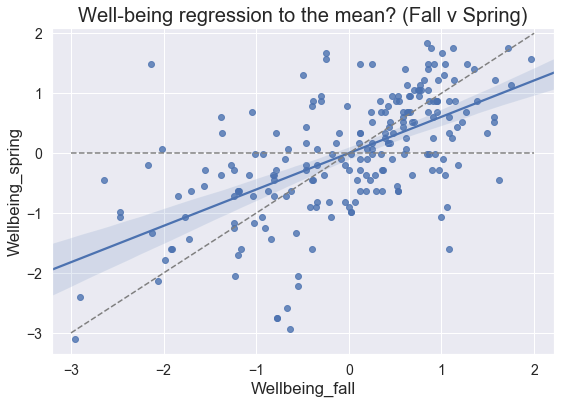

In [20]:
ax = sns.regplot('Wellbeing_fall', 'Wellbeing_spring', data=df)
ax.plot([-3, 2], [-3, 2], color='gray', linestyle='--', scalex=False, scaley=False);
ax.plot([-3, 2], [0, 0], color='gray', linestyle='--', scalex=False, scaley=False);
ax.set_title('Well-being regression to the mean? (Fall v Spring)')

Text(0.5, 1.0, 'Well-being regression to the mean? (Fall v Change)')

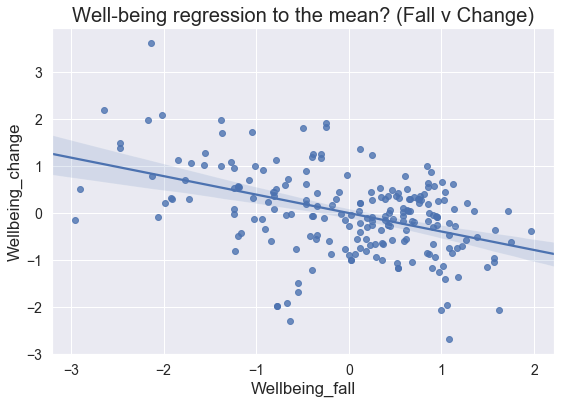

In [21]:
sns.regplot('Wellbeing_fall', 'Wellbeing_change', data=df)
plt.title('Well-being regression to the mean? (Fall v Change)')

Text(0.5, 1.0, 'Well-being change distribution - roughly symmetrical')

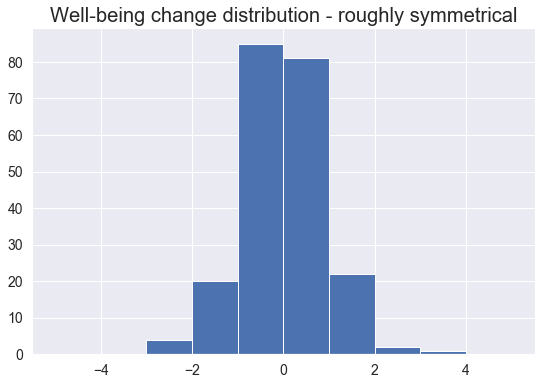

In [22]:
df['Wellbeing_change'].hist(bins=np.arange(-5, 5.1, 1))
plt.title('Well-being change distribution - roughly symmetrical')

---
## Quick dorm-level summary
---

In [23]:
df.head()

,NID,Extraversion,Agreeableness,Openness,Conscientiousness,NPI,Positive_empathy,Pos_efficacy,Neg_efficacy,Pos_tendency,Neg_Tendency,Need_Belong,Prosociality,Emp_theory,RS_1,RS_2,Self_Esteem,Self_monitor,Distress_Disclosure,Guidance,Warmth,Integration,Attachment,Nurturance,Reliable,Anticipated_Risks,Anticipated_Benefits,PI,SI,CI,BFNE,BAS_drive,BAS_Fun_seeking,BAS_Fun_Reward_responsiveness,Suppression,Cogntive_Reappraisal,Extensic_improve,Extensic_worse,Intrinsic_imrpove,Intrinsic_worse,Empathic_Concern,Perspective_Taking,Personal_Distress,Wellbeing_fall,Wellbeing_spring,Wellbeing_change
0,7.0,4.0,4.0,5.5,4.5,4.333333,5.142857,7.50,6.25,5.25,3.75,4.2,2.666667,3.000000,6.250,5.500,3.1,19.0,3.071429,2.50,3.5,2.5,3.25,2.75,2.50,5.75,5.00,5.000000,4.25,2.375,4.857143,3.25,3.0,4.2,7.00,4.166667,5.833333,2.0,3.000000,5.50,2.166667,1.857143,1.428571,-1.842964,-0.720490,1.122474
1,11.0,6.0,4.5,5.0,5.5,6.000000,5.000000,7.25,7.25,8.00,7.50,6.0,4.000000,3.000000,7.250,7.250,2.2,14.0,6.000000,5.00,5.0,5.0,5.00,5.00,5.00,5.00,5.00,5.000000,5.00,5.000,6.000000,5.00,5.0,5.0,8.00,8.000000,6.000000,6.0,6.000000,6.00,2.833333,2.571429,2.000000,0.862695,-0.013563,-0.876258
2,9.0,3.0,6.0,6.5,6.0,3.533333,4.142857,5.50,6.75,5.50,5.00,4.0,2.750000,3.166667,4.625,5.375,1.8,10.0,2.857143,4.00,3.0,3.5,2.75,2.25,4.00,4.75,4.25,4.833333,3.75,3.500,2.857143,3.00,4.0,3.8,3.25,5.666667,3.166667,2.0,3.666667,2.00,2.500000,2.142857,1.285714,0.234578,0.693364,0.458786
3,4.0,4.0,5.5,6.5,6.5,4.000000,4.714286,6.00,6.75,5.50,5.25,4.0,3.000000,3.333333,6.250,5.375,2.0,13.0,3.000000,2.75,3.0,3.0,3.00,2.75,3.25,5.25,4.50,5.166667,4.50,4.000,3.857143,4.25,4.0,4.4,4.25,5.833333,4.000000,2.0,3.500000,2.25,2.833333,2.142857,0.857143,0.707840,0.516632,-0.191207
4,5.0,4.5,5.0,6.0,6.0,3.800000,5.000000,7.50,7.25,5.75,5.00,4.1,2.666667,3.666667,4.875,6.375,1.8,18.0,2.857143,3.50,3.0,3.5,3.00,3.00,3.00,5.00,4.50,5.333333,3.50,4.000,3.000000,4.00,4.5,4.8,5.25,6.166667,5.333333,2.0,5.000000,2.25,2.666667,2.142857,2.000000,0.841096,-0.013563,-0.854659


In [24]:
df_dorm_means = df.groupby('NID').mean()
df_dorm_means.insert(0, 'N_ParticipantsInDorm', df.groupby('NID').size())
df_dorm_means

,N_ParticipantsInDorm,Extraversion,Agreeableness,Openness,Conscientiousness,NPI,Positive_empathy,Pos_efficacy,Neg_efficacy,Pos_tendency,Neg_Tendency,Need_Belong,Prosociality,Emp_theory,RS_1,RS_2,Self_Esteem,Self_monitor,Distress_Disclosure,Guidance,Warmth,Integration,Attachment,Nurturance,Reliable,Anticipated_Risks,Anticipated_Benefits,PI,SI,CI,BFNE,BAS_drive,BAS_Fun_seeking,BAS_Fun_Reward_responsiveness,Suppression,Cogntive_Reappraisal,Extensic_improve,Extensic_worse,Intrinsic_imrpove,Intrinsic_worse,Empathic_Concern,Perspective_Taking,Personal_Distress,Wellbeing_fall,Wellbeing_spring,Wellbeing_change
NID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1.0,15,4.666667,5.000000,5.166667,5.666667,4.013333,4.542857,6.916667,7.216667,6.000000,5.266667,4.326667,2.933333,3.844444,4.866667,5.450000,2.093333,13.800000,3.271429,3.583333,3.366667,3.466667,3.316667,3.183333,3.550000,4.250000,4.666667,5.222222,4.616667,3.850000,3.733333,4.033333,4.300000,4.413333,5.150000,6.055556,4.955556,2.600000,4.477778,3.000000,2.777778,2.742857,1.304762,0.225261,0.445939,0.220679
2.0,24,3.895833,5.375000,5.104167,5.333333,3.838889,4.880952,6.291667,6.937500,6.218750,5.520833,4.062500,2.930556,3.965278,4.697917,5.697917,2.241667,12.750000,3.431548,3.416667,3.333333,3.250000,3.187500,3.000000,3.562500,4.260417,4.770833,5.145833,4.364583,3.984375,4.077381,3.854167,3.895833,4.483333,4.291667,5.777778,4.715278,2.472222,4.229167,3.479167,2.805556,2.636905,1.886905,-0.007091,0.218397,0.225488
4.0,32,3.953125,4.796875,4.921875,5.687500,3.525000,4.415179,6.015625,6.210938,5.859375,4.578125,3.890625,2.588542,3.520833,5.152344,5.261719,2.340625,12.125000,3.247768,3.195312,3.070312,3.265625,3.304688,2.796875,3.367188,4.625000,4.281250,4.869792,4.085938,3.792969,4.013393,3.671875,3.859375,4.218750,4.960938,5.416667,4.234375,2.468750,3.906250,3.218750,2.666667,2.562500,1.995536,0.024351,0.000244,-0.024107
5.0,18,3.805556,5.138889,5.277778,5.388889,3.840741,4.738095,6.513889,6.833333,6.013889,4.902778,4.166667,2.805556,3.453704,4.784722,5.243056,2.222222,15.222222,3.579365,3.347222,2.986111,3.194444,3.263889,2.930556,3.430556,4.750000,4.277778,5.231481,4.638889,3.881944,4.539683,3.944444,4.125000,4.544444,5.500000,5.851852,5.185185,2.444444,3.944444,3.472222,2.805556,2.563492,1.801587,0.002538,0.118986,0.116448
7.0,23,4.782609,4.891304,5.478261,5.695652,3.892754,4.844720,6.184783,6.304348,5.619565,4.532609,3.991304,2.666667,3.673913,4.630435,5.815217,2.152174,14.478261,3.285714,3.500000,3.347826,3.326087,3.369565,2.891304,3.500000,4.467391,4.250000,4.847826,4.304348,3.961957,3.987578,3.673913,3.858696,4.321739,5.119565,5.898551,4.811594,2.623188,4.521739,3.195652,2.543478,2.310559,1.664596,0.138954,0.216957,0.078003
8.0,24,3.687500,5.187500,5.291667,5.437500,3.897222,4.934524,6.385417,6.729167,5.666667,4.802083,3.945833,3.052083,4.166667,5.005208,5.385417,2.358333,13.541667,3.315476,3.447917,3.322917,3.437500,3.260417,3.218750,3.416667,4.468750,4.479167,4.993056,4.208333,4.145833,4.386905,3.614583,3.927083,4.291667,4.645833,5.729167,5.125000,2.444444,4.333333,3.260417,2.923611,2.708333,1.696429,-0.146208,-0.355981,-0.209773
9.0,7,4.357143,4.714286,6.214286,5.214286,3.266667,4.408163,4.964286,5.642857,4.535714,3.857143,3.614286,2.547619,3.785714,4.785714,5.625000,2.371429,11.285714,3.132653,3.035714,3.071429,3.000000,3.178571,2.750000,2.928571,5.142857,4.250000,4.857143,4.107143,3.964286,4.408163,3.321429,3.464286,4.142857,4.678571,5.571429,4.452381,2.380952,3.523810,3.142857,2.476190,2.632653,2.000000,-0.147131,-0.657372,-0.510240
10.0,17,4.411765,4.558824,5.500000,5.235294,3.886275,5.058824,6.617647,6.911765,6.617647,5.088235,4.358824,2.799020,3.450980,4.889706,5.727941,2.252941,12.235294,3.277311,3.602941,3.455882,3.426471,3.367647,2.941176,3.426471,4.397059,4.735294,4.813725,4.323529,4.051471,4.285714,3.588235,3.926471,4.588235,4.794118,5.372549,4.656863,2.313725,4.186275,3.147059,2.754902,2.537815,1.957983,-0.397971,-0.304651,0.093320
11.0,16,4.437500,4.968750,

## Split off "test" data - two entire dorms, approximately 20% of all data

In [25]:
df_test = df[df['NID'].isin([7, 15])]
df = df[-df['NID'].isin([7, 15])]
print("Train: %d participants. Test: %d participants." % (len(df), len(df_test)))
df_dorm_means_test = df_dorm_means.loc[[7, 15]]
df_dorm_means = df_dorm_means.drop([7, 15])
print("Train: %d dorms. Test: %d dorms." % (len(df_dorm_means), len(df_dorm_means_test)))

Train: 175 participants. Test: 40 participants.
Train: 9 dorms. Test: 2 dorms.


## Analyses

### Glance at raw correlations -- a bit overwhelming, though

In [26]:
corr_indiv = df.corr()['Wellbeing_spring']
corr_indiv.name = 'individual'

corr_dorm_means = df_dorm_means.corr()['Wellbeing_spring']
corr_dorm_means.name = 'dorm'

frame = pd.DataFrame([corr_indiv, corr_dorm_means]).T.drop(['NID', 'Wellbeing_change'])
frame.iloc[frame['individual'].abs().argsort()][::-1]

,individual,dorm
N_ParticipantsInDorm,NaN,0.165864
Wellbeing_spring,1.000000,1.000000
Wellbeing_fall,0.607409,0.808092
Self_Esteem,-0.477256,-0.872198
BFNE,-0.435743,-0.679606
Intrinsic_worse,-0.396009,-0.211802
Personal_Distress,-0.343120,-0.591826
Cogntive_Reappraisal,0.333725,0.608073
Reliable,0.328793,0.787396
Guidance,0.299823,0.472892


Text(0.5, 1.0, 'Correlation with spring well-being')

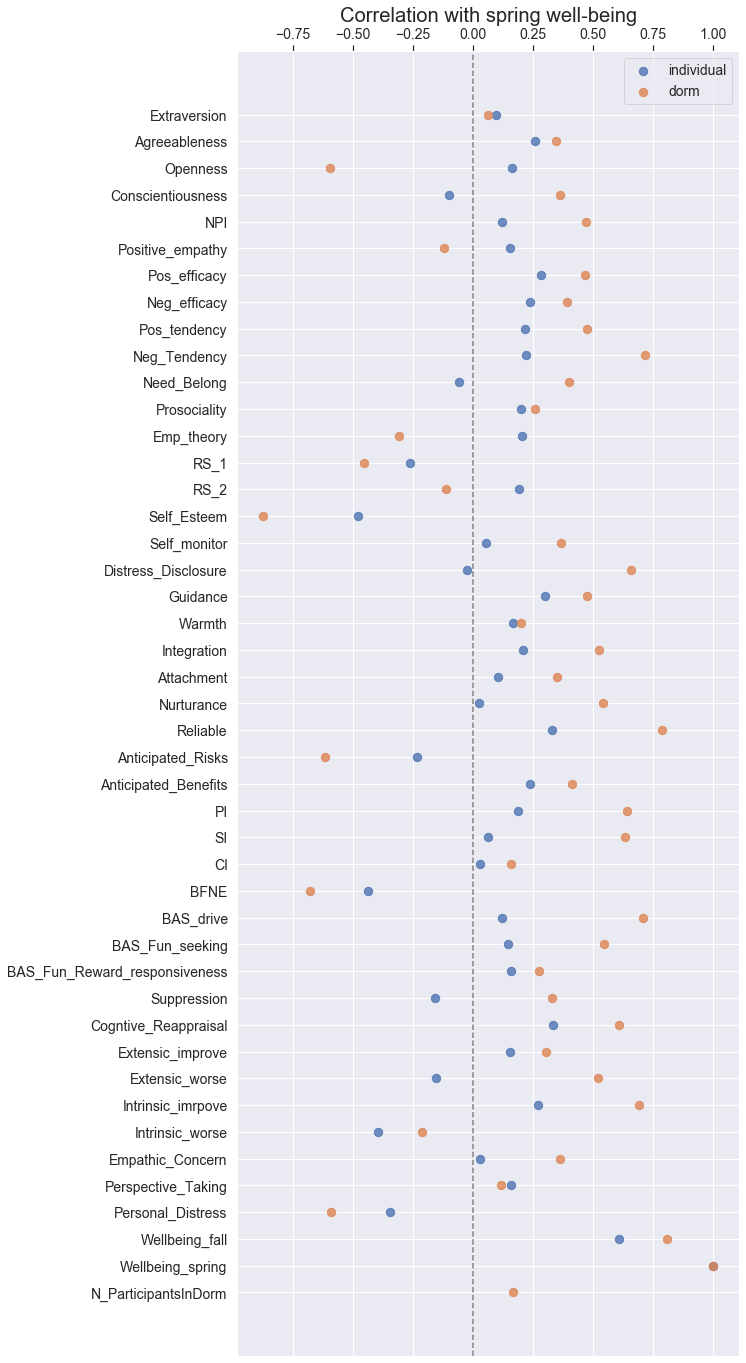

In [27]:
frame = frame[::-1]  # For plotting in the same visual order
fig, ax = plt.subplots(1)
fig.set_size_inches(9, 24)
for col in frame.columns:
    ax.scatter(frame[col], frame.index, label=col, alpha=0.8, s=70)
ax.legend(loc='upper right')
ax.plot([0, 0], ax.get_ylim(), scaley=False, linestyle='--', color='gray')
ax.xaxis.tick_top()
ax.set_title('Correlation with spring well-being')

In [126]:
from sklearn import linear_model

In [146]:
base_model = linear_model.LinearRegression()
X = df[['Wellbeing_fall']].copy()
X = X.values
y = df['Wellbeing_spring'].values
base_model.fit(X[:160], y[:160])
base_model.intercept_, base_model.coef_, base_model.score(X[160:], y[160:])

(0.028648845472860146, array([0.58691006]), 0.323819445488729)

In [110]:
def compute_correlations(frame):
    dorm_means = frame.groupby('NID').mean()
    dorm_means['N_ParticipantsInDorm'] = frame.groupby('NID').size()
    a = dorm_means.corr()['Wellbeing_change']
    a.name = 'dorm_mean'

    dorm_means_shuffled = frame.groupby(frame['NID'].sample(frac=1, replace=False).values).mean()
    dorm_means_shuffled['N_ParticipantsInDorm'] = frame.groupby('NID').size()
    d = dorm_means_shuffled.corr()['Wellbeing_change']
    d.name = 'dorm_mean_shuffled'
    
    dorm_stds = frame.groupby('NID').std()
    dorm_stds['Wellbeing_change'] = dorm_means['Wellbeing_change']
    b = dorm_stds.corr()['Wellbeing_change']
    b.name = 'dorm_std'
    
    c = frame.corr()['Wellbeing_change']
    c.name = 'individual'
    return pd.DataFrame([a, b, c, d]).T.drop(['NID', 'Wellbeing_spring', 'Wellbeing_change'])

In [113]:
s = df['NID'].sample(frac=1, replace=False)
s.index = range(len(s))
s.head()

0     2.0
1    11.0
2     2.0
3     4.0
4     4.0
Name: NID, dtype: float64

In [115]:
s.value_counts().sort_index()

1.0     15
2.0     24
4.0     32
5.0     18
7.0     23
8.0     24
9.0      7
10.0    17
11.0    16
13.0    22
15.0    17
Name: NID, dtype: int64

In [116]:
df['NID'].head()

0     7.0
1    11.0
2     9.0
3     4.0
4     5.0
Name: NID, dtype: float64

In [117]:
df['NID'].value_counts().sort_index()

1.0     15
2.0     24
4.0     32
5.0     18
7.0     23
8.0     24
9.0      7
10.0    17
11.0    16
13.0    22
15.0    17
Name: NID, dtype: int64

In [124]:
df_corr = compute_correlations(df)
df_corr

,dorm_mean,dorm_std,individual,dorm_mean_shuffled
Extraversion,0.122675,0.620820,-0.057776,0.004935
Agreeableness,0.259696,-0.667764,0.160775,0.340222
Openness,-0.648932,0.641885,-0.112443,-0.130070
Conscientiousness,0.193909,-0.050675,-0.108846,-0.441196
NPI,0.572707,0.084847,-0.074720,-0.097562
Positive_empathy,0.380552,-0.013870,0.008542,0.431967
Pos_efficacy,0.805827,-0.589862,0.105774,0.219391
Neg_efficacy,0.739746,-0.555315,0.197856,-0.022720
Pos_tendency,0.838715,-0.333520,0.161080,0.044831
Neg_Tendency,0.881889,0.671430,0.130040,-0.185302


In [25]:
shuffle_df = df.copy()
shuffled_corrs = []
for i in range(5000):
    if i % 100 == 0:
        print(i, end=' ')
    for c in shuffle_df.columns:
        shuffle_df[c] = shuffle_df[c].sample(frac=1, replace=False).values
    shuffled_corrs.append(compute_correlations(shuffle_df))

0 100 200 300 400 500 600 700 800 900 1000 1100 1200 1300 1400 1500 1600 1700 1800 1900 2000 2100 2200 2300 2400 2500 2600 2700 2800 2900 3000 3100 3200 3300 3400 3500 3600 3700 3800 3900 4000 4100 4200 4300 4400 4500 4600 4700 4800 4900 

### Goal
For each correlation, we want to know how meaningful it is. We want to compare the correlation to the range of values that one might get under a null hypothesis. Iff we are to declare a value "significant" if it falls outside this range, then we want to control these ranges such that we would not find anything significant under the null 95% of the time.

In [57]:
TARGET_FWER_PERCENT = 5
p = 1 - TARGET_FWER_PERCENT/100

fwer_threshold_pct = 95

# Bonferroni correction
# k = len(df_corr)
# # x ^ k = p (solve for x)
# # k * log(x) = log(p)
# # log(x) = log(p)/k
# # x = exp(log(p)/k)
# fwer_threshold_pct = np.exp(np.log(p)/k) * 100
# fwer_threshold_pct, (fwer_threshold_pct / 100) ** k, k



In [58]:
null_lo = {}
null_hi = {}
for row in df_corr.index:
    null_lo_row = {}
    null_hi_row = {}
    for col in df_corr.columns:
        values = [corr.loc[row, col] for corr in shuffled_corrs]
        null_lo_row[col] = np.percentile(values, (100 - fwer_threshold_pct)/2)
        null_hi_row[col] = np.percentile(values, 100 - (100 - fwer_threshold_pct)/2)
    null_lo[row] = null_lo_row
    null_hi[row] = null_hi_row

In [59]:
null_lo['PSS']

{'dorm_mean': -0.64062046890952,
 'dorm_std': -0.6316433917571471,
 'individual': -0.13174756970357138}

In [60]:
null_hi['PSS']

{'dorm_mean': 0.6246545893226526,
 'dorm_std': 0.6332084850783481,
 'individual': 0.13628040817742426}

In [61]:
# For plot aesthetics
df_corr = df_corr[::-1]

In [73]:
def make_plot(column, title, color=SNS_BLUE):
    fig, ax = plt.subplots(1)

    # Plot content
    ax.set_title(title)
    ax.scatter(df_corr[column], df_corr[column].index, color=color, s=80)
    for x, y in zip(df_corr[column], df_corr[column].index):
        offset = 0.02 if x > 0 else -0.02
        text = '%.2f' % x
        if x < null_lo[y][column] or x > null_hi[y][column]:
            text = text + "*"
        ax.text(x + offset, y, text, horizontalalignment='left' if x >= 0 else 'right')

    for y, col in enumerate(df_corr.index):
        ax.plot([null_lo[col][column], null_hi[col][column]], [y, y],
                color=color, alpha=0.5, linewidth=3)

    # Meta detail
    ylim = ax.get_ylim()
    ax.plot([0, 0], ylim, color='gray', linestyle='--')
    ax.set_ylim(ylim)
    ax.set_xlabel('Correlation (r) with change in well-being')
    ax.set_ylabel('Fall trait survey measure')
    suffix = 'all' if KEEP_ALL_PREDICTORS else 'brief'
    fig.set_size_inches(10, 2 + len(df_corr)/3)
    fig.savefig(f'{PLOT_DIR}wellbeing_corrs_{title}_{suffix}.png')

In [74]:
significance_line = '(Points outside bars are significant at p < %.2f)' % (TARGET_FWER_PERCENT / 100)
print(significance_line)

(Points outside bars are significant at p < 0.05)


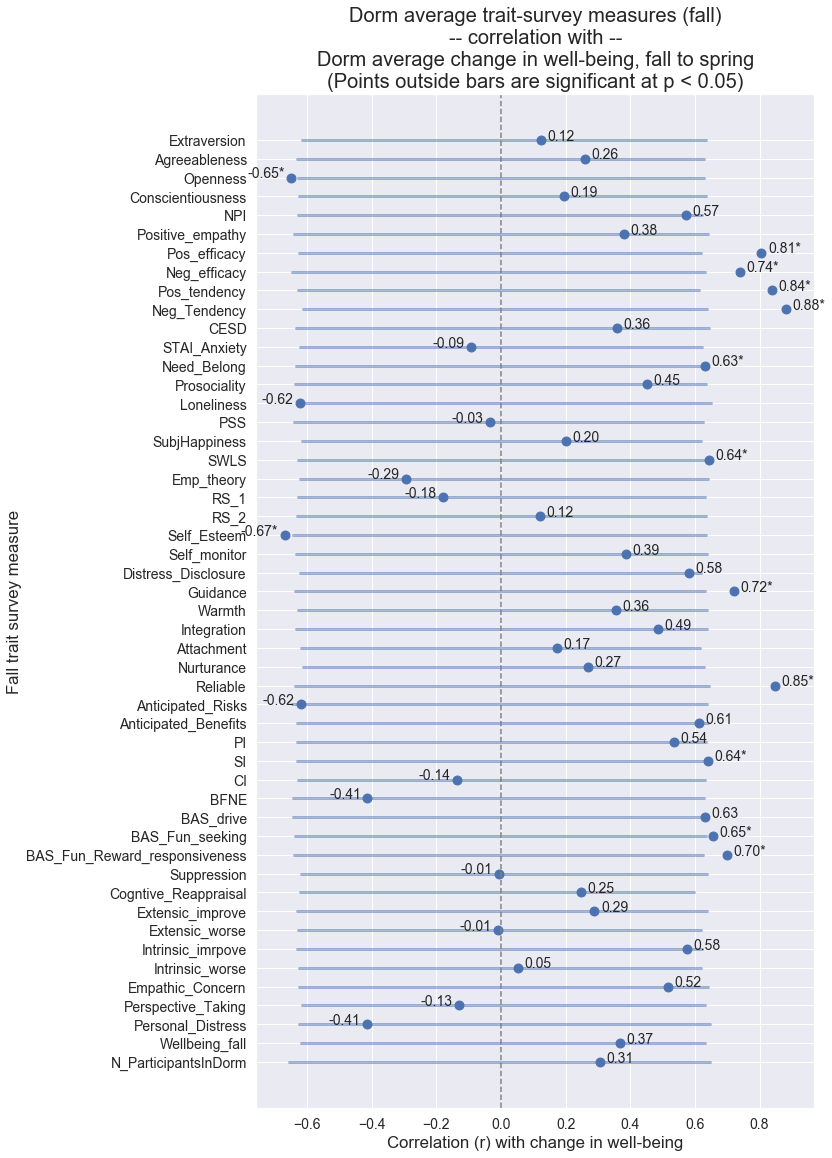

In [75]:
make_plot('dorm_mean',
          'Dorm average trait-survey measures (fall)\n'
          '-- correlation with --\n'
          'Dorm average change in well-being, fall to spring\n'
          + significance_line)

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


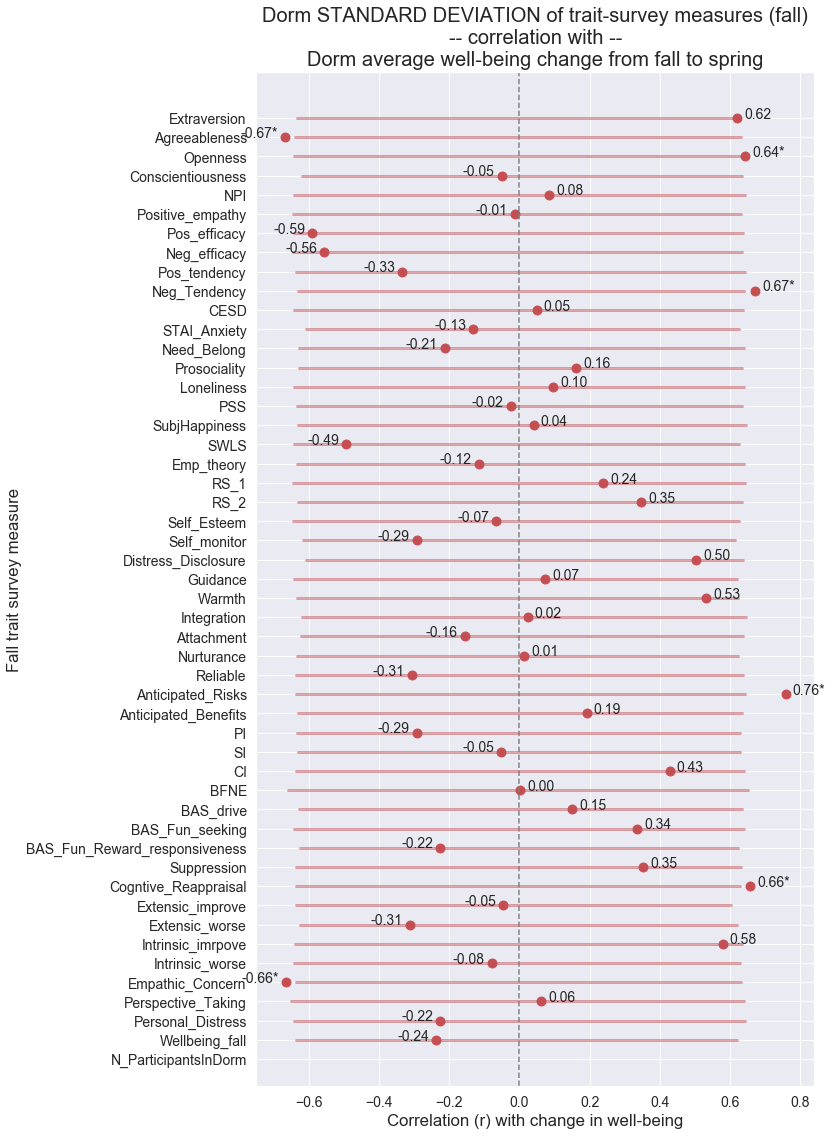

In [76]:
make_plot('dorm_std',
          'Dorm STANDARD DEVIATION of trait-survey measures (fall)\n-- correlation with --\nDorm average well-being change from fall to spring',
          color=SNS_RED)

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


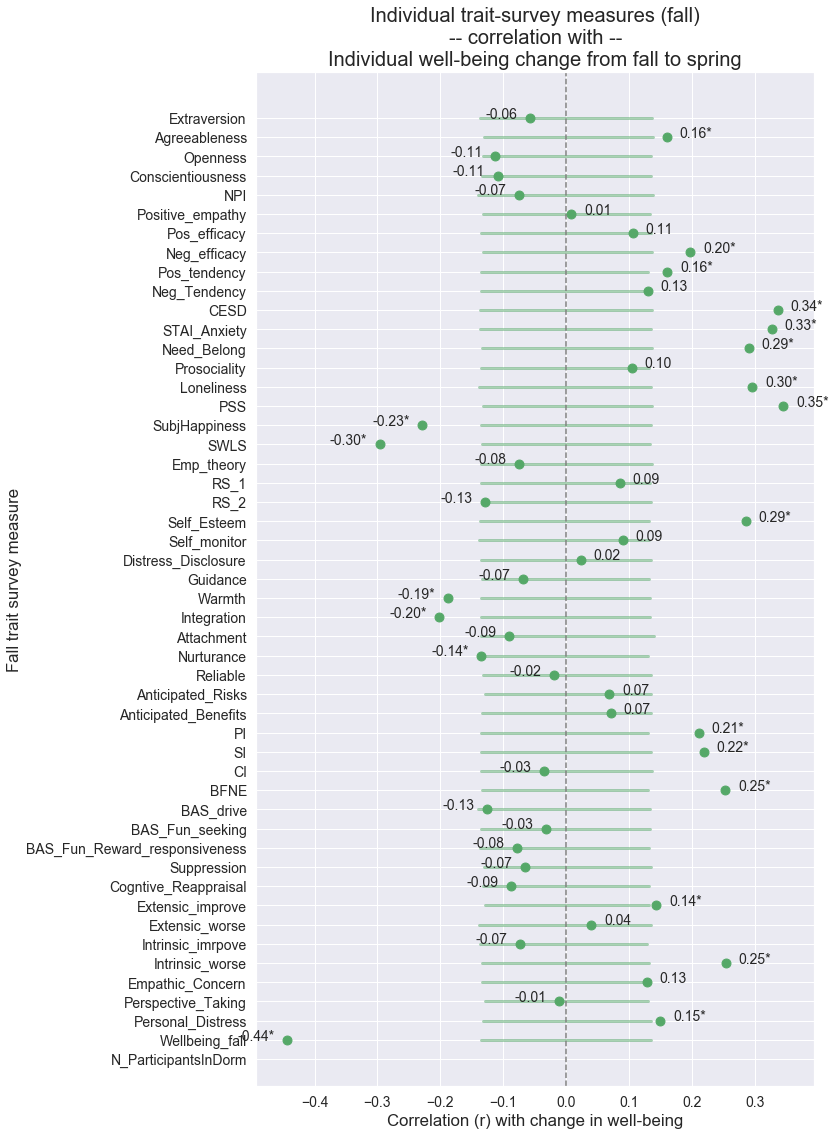

In [77]:
make_plot('individual',
          'Individual trait-survey measures (fall)\n-- correlation with --\nIndividual well-being change from fall to spring',
         color=SNS_GREEN)